# Exploring Canadian Injuries by age

Using the ["Injuries in Canada, 2017 (Table 2: External Cause by Age)" dataset](https://open.canada.ca/data/en/dataset/b7269b13-9dbd-4c8e-8dba-605e82aad8e7/resource/ec072fb4-328c-4f74-8e05-e01331edd358), I wanted to ask the question:
> What is the leading cause of injury for Canadians depending on their age?

In [164]:
library(tidyverse)
library(dplyr)
library(stringr)
library(janitor)
library("scales")
library(RColorBrewer)

In [165]:
injuries <- read_delim("data/CHIRPP 2017 - Cause by Age.csv", delim=",", skip=3)
head(injuries)

Rows: 19 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11):                                                                   ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,"""0-4 YRS""","""5-9 YRS""","""10-14 YRS""","""15-19 YRS""","""20-29 YRS""","""30-39 YRS""","""40-49 YRS""","""50-64 YRS""","""65+ YRS""","""Total"""
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TRANSPORT INJURIES OCCURING IN TRAFFIC,"""493 (9.86%)""","""643 (12.85%)""","""838 (16.75%)""","""768 (15.35%)""","""674 (13.47%)""","""423 (8.46%)""","""334 (6.68%)""","""528 (10.56%)""","""301 (6.02%)""",5002
ALL OTHER TRANSPORT INJURIES - NOT IN TRAFFIC,"""282 (7.43%)""","""851 (22.42%)""","""1068 (28.14%)""","""478 (12.60%)""","""280 (7.38%)""","""206 (5.43%)""","""204 (5.38%)""","""297 (7.83%)""","""129 (3.40%)""",3795
"OTHER INCL WATER TRANSPORT, AIR TRANSPORT, CABLE-CAR, SKI CHAIR-LIFT, SKI-LIFT WITH GONDOLA","""47 (4.70%)""","""157 (15.70%)""","""253 (25.30%)""","""162 (16.20%)""","""121 (12.10%)""","""78 (7.80%)""","""67 (6.70%)""","""88 (8.80%)""","""27 (2.70%)""",1000
FALLS,"""20051 (29.21%)""","""14366 (20.93%)""","""13929 (20.29%)""","""5230 (7.62%)""","""2413 (3.51%)""","""1635 (2.38%)""","""1576 (2.30%)""","""3545 (5.16%)""","""5906 (8.60%)""",68651
STRUCK BY/AGAINST OBJECTS,"""5474 (16.65%)""","""6165 (18.76%)""","""10503 (31.96%)""","""5591 (17.01%)""","""1702 (5.18%)""","""1036 (3.15%)""","""865 (2.63%)""","""1015 (3.09%)""","""517 (1.57%)""",32868
CUT/PIERCE,"""682 (11.08%)""","""810 (13.15%)""","""706 (11.46%)""","""650 (10.56%)""","""999 (16.22%)""","""690 (11.20%)""","""520 (8.44%)""","""768 (12.47%)""","""333 (5.41%)""",6158


In [166]:
injuries <- read_delim("data/CHIRPP 2017 - Cause by Age.csv", delim=",", skip=3, col_types = cols(.default = "c")) |>
    clean_names() |>
    mutate(across(2:11, ~ as.numeric(str_extract(.x, "[0-9]+")))) |>
    select(1:10) |>
    pivot_longer(
        cols = 2:10,
       names_to = "Age",
       values_to = "Numbers"
    ) |>
    mutate(Age = str_extract(Age, pattern = "[0-9]+_[0-9]+")) |>
    mutate(Age = str_replace(Age, "_", " - ")) |>
    na.omit()
print(injuries, n=171)

# A tibble: 112 × 3
    x                                                              Age   Numbers
    <chr>                                                          <chr>   <dbl>
  1 "TRANSPORT INJURIES OCCURING IN TRAFFIC                      … 0 - 4     493
  2 "TRANSPORT INJURIES OCCURING IN TRAFFIC                      … 5 - 9     643
  3 "TRANSPORT INJURIES OCCURING IN TRAFFIC                      … 10 -…     838
  4 "TRANSPORT INJURIES OCCURING IN TRAFFIC                      … 15 -…     768
  5 "TRANSPORT INJURIES OCCURING IN TRAFFIC                      … 20 -…     674
  6 "TRANSPORT INJURIES OCCURING IN TRAFFIC                      … 30 -…     423
  7 "TRANSPORT INJURIES OCCURING IN TRAFFIC                      … 40 -…     334
  8 "TRANSPORT INJURIES OCCURING IN TRAFFIC                      … 50 -…     528
  9 "ALL OTHER TRANSPORT INJURIES - NOT IN TRAFFIC               … 0 - 4     282
 10 "ALL OTHER TRANSPORT INJURIES - NOT IN TRAFFIC               … 5 - 9     851
 11 "ALL

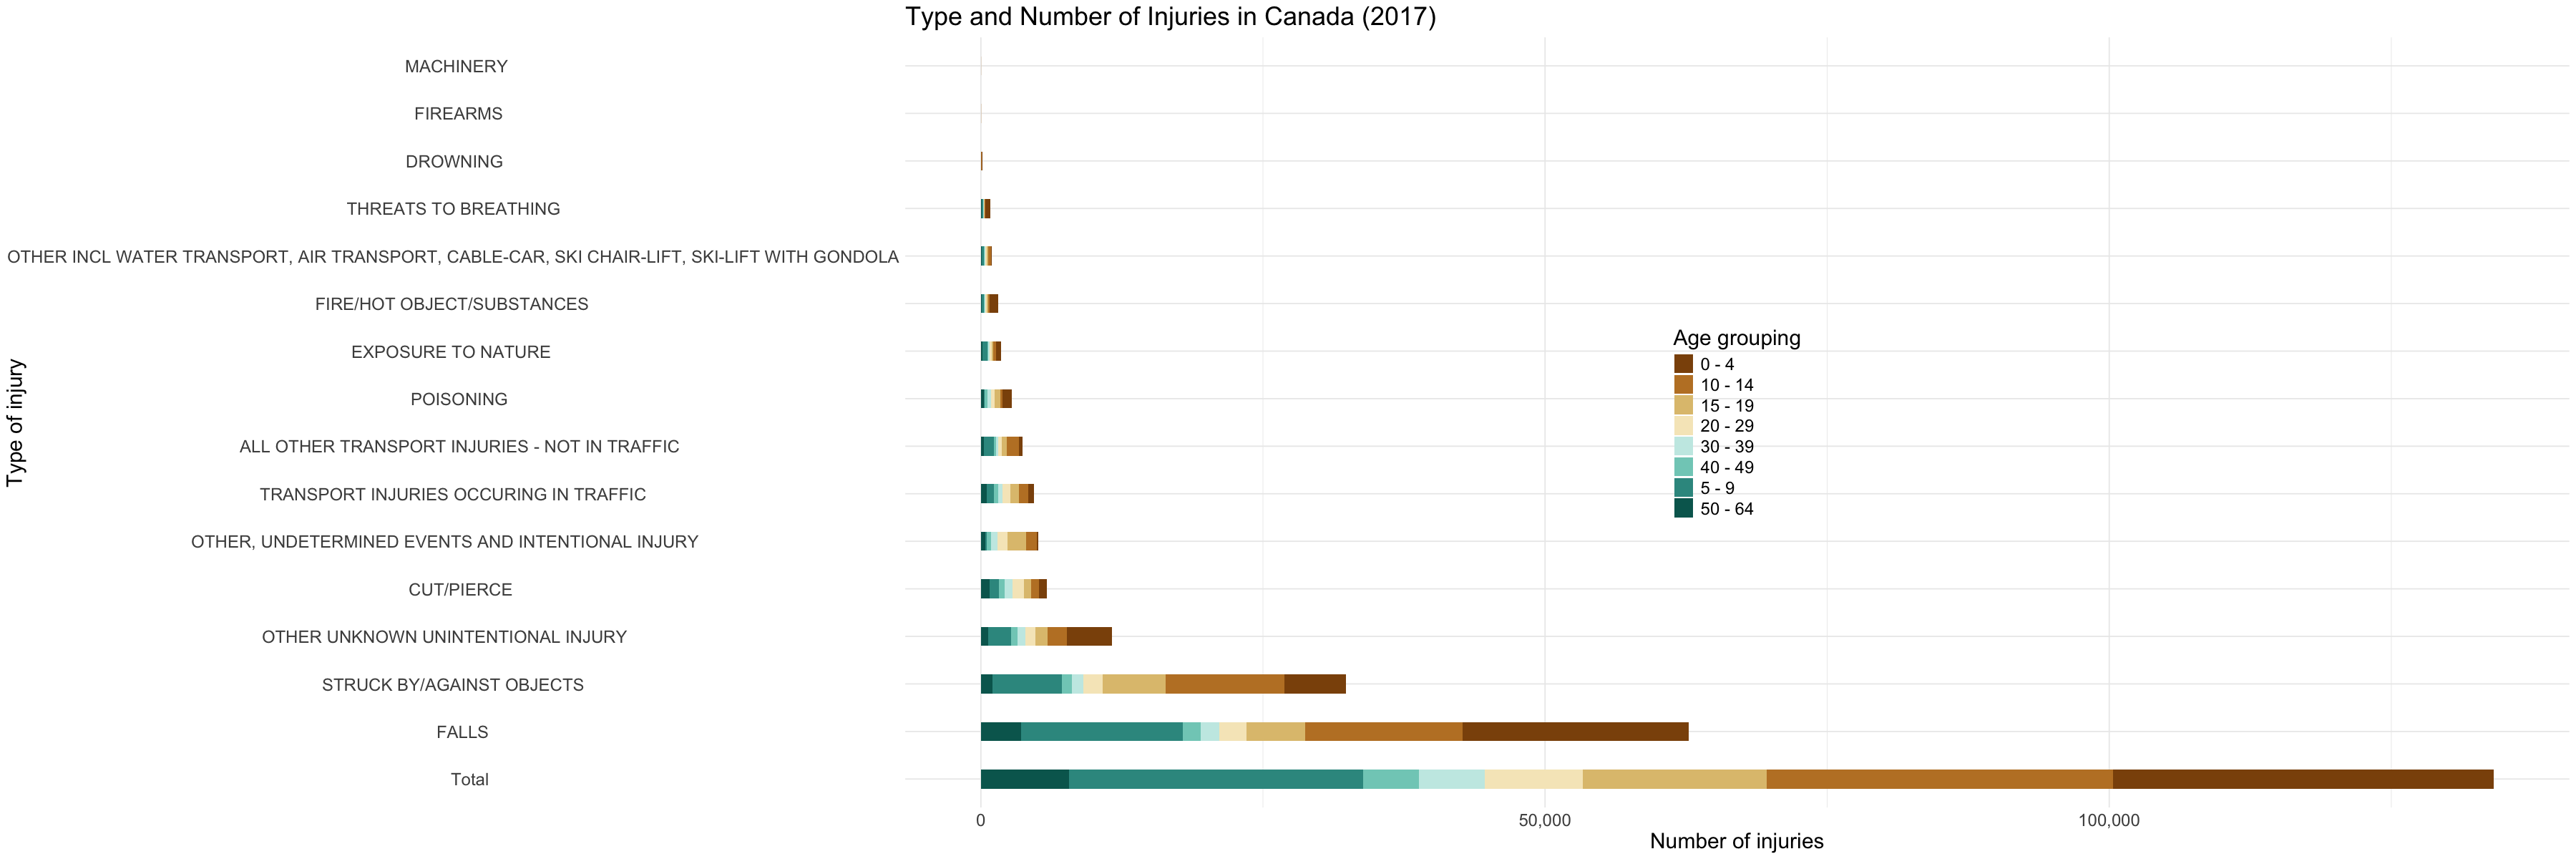

In [186]:
injuries_bar <- injuries |>
    group_by(x) |>
    ggplot(aes(x=Numbers, y=reorder(x, -Numbers), fill=Age)) +
    geom_bar(stat = "identity", width = 0.4) +
    labs(x="Number of injuries", y="Type of injury", fill="Age grouping") +
    scale_x_continuous(labels = comma) +
    theme_minimal() +
    theme(legend.position = "inside", text = element_text(size = 18)) +
    scale_fill_brewer(palette = "BrBG") +
    ggtitle("Type and Number of Injuries in Canada (2017)") #+
    # facet_wrap(facets = vars(Age), nrow = 1)

options(repr.plot.width = 30, repr.plot.height = 10)

injuries_bar